### Problem Statement:

The Placement of students is one of the most important objective of an educational institution. Reputation and yearly admissions of an institution invariably depend on the placements it provides it students with. That is why all the institutions, arduously, strive to strengthen their placement department so as to improve their institution on a whole. Any assistance in this particular area will have a positive impact on an institution's ability to place its students. This will always be helpful to both the students, as well as the institution.

### Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that's best fit for the above case.

### Goal of the project
The main goal is to predict whether the student will be recruited in campus placements or not based on the available factors in the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\MADHU\Downloads\campusplacement projectfiles\train.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


### Features information
1.Gender   --- Gender of student(male=0, female=1)

2.ssc_p    --- Ssc percentage

3.ssc_b    --- Ssc board

4.hsc_p    --- Hsc percentage

5.Hsc_b    --- Hsc board

6.Hsc_s    --- Hsc stream

7.Degree_p --- Degree percentage

8.Degree_t --- Graduation stream(field of degree education)

9.Workex   --- WorkExperience

10.Etest_p  --- Online test percentage

11.Specialisation ---- Specialization in  post graduation Mba

12.Mba_p    ---- Mba percentage

13.Status   --- (target variable)placed or not placed

14.Salary   --- salary offered by companies


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


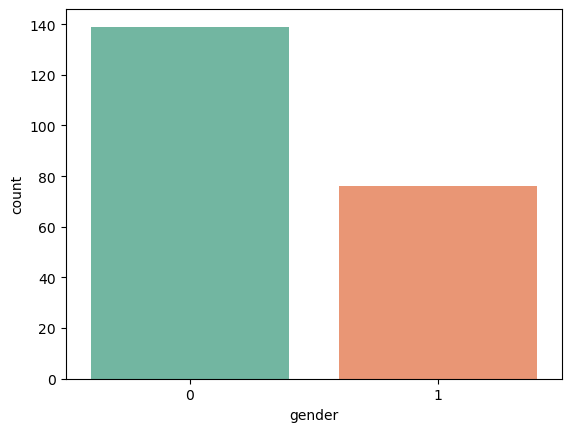

In [9]:
# finding the count of males and females
sns.countplot(df.gender, palette='Set2')
plt.show()

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


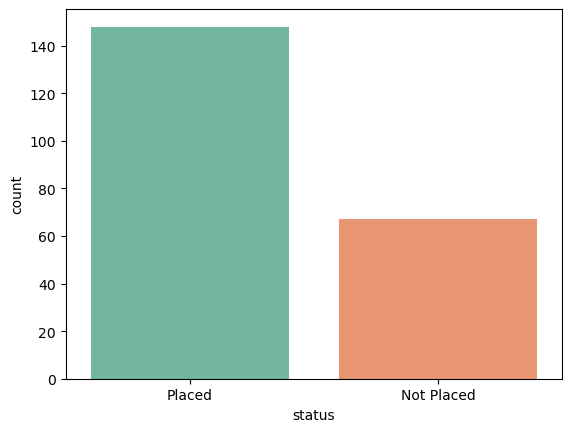

In [10]:
sns.countplot(df.status, palette='Set2')
plt.show()

<AxesSubplot:ylabel='status'>

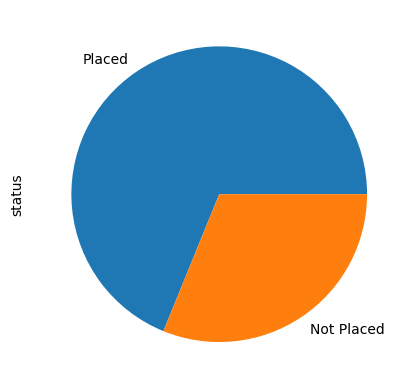

In [11]:
df["status"].value_counts().plot.pie()

### majority of students are placed

In [12]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [13]:
#renaming the Columns
df.rename(columns={'sl_no':'S.No', 'gender':'Gender', 'ssc_p':'10th%', 'ssc_b':'10th_board', 'hsc_p':'12th%', 'hsc_b':'12th_board', 
 'hsc_s':'12th_specialization', 'degree_p':'graduation%', 'degree_t':'graduation_stream', 'workex':'Work_experience',
 'etest_p':'online_test%', 'specialisation':'MBA_specialization', 'mba_p':'MBA%', 'status':'Status', 'salary':'Salary'},
          inplace=True)

In [14]:
# After renaming the columns
df.columns

Index(['S.No', 'Gender', '10th%', '10th_board', '12th%', '12th_board',
       '12th_specialization', 'graduation%', 'graduation_stream',
       'Work_experience', 'online_test%', 'MBA_specialization', 'MBA%',
       'Status', 'Salary'],
      dtype='object')

In [15]:
# categorical features
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['10th_board', '12th_board', '12th_specialization', 'graduation_stream',
       'Work_experience', 'MBA_specialization', 'Status'],
      dtype='object')

In [16]:
numerical = df.select_dtypes(include=['int', 'float'])
numerical.columns

Index(['S.No', 'Gender', '10th%', '12th%', 'graduation%', 'online_test%',
       'MBA%', 'Salary'],
      dtype='object')

Text(0, 0.5, 'Density')

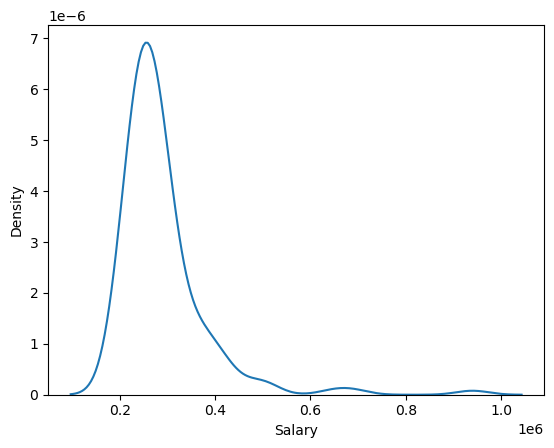

In [17]:
# checking the salary distribution
sns.kdeplot(data=df,x='Salary')
plt.xlabel('Salary')
plt.ylabel('Density')

In [18]:
for i in categorical:
    unique_values = df[i].unique()
    print(f"Unique values in column '{i}': {unique_values}")



Unique values in column '10th_board': ['Others' 'Central']
Unique values in column '12th_board': ['Others' 'Central']
Unique values in column '12th_specialization': ['Commerce' 'Science' 'Arts']
Unique values in column 'graduation_stream': ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in column 'Work_experience': ['No' 'Yes']
Unique values in column 'MBA_specialization': ['Mkt&HR' 'Mkt&Fin']
Unique values in column 'Status': ['Placed' 'Not Placed']


In [19]:
#Bivariant analysis
df[['Status', 'Salary']][np.isnan(df.Salary)]


,Status,Salary
3,Not Placed,NaN
5,Not Placed,NaN
6,Not Placed,NaN
9,Not Placed,NaN
12,Not Placed,NaN
...,...,...
198,Not Placed,NaN
201,Not Placed,NaN
206,Not Placed,NaN
208,Not Placed,NaN


If we examine the Salary of students who did not get placed, we observe that all of these students have a Salary value of 0.

In [20]:
# replacing the null values with 0
df = df.fillna(0)

In [21]:
df.isnull().sum()

S.No                   0
Gender                 0
10th%                  0
10th_board             0
12th%                  0
12th_board             0
12th_specialization    0
graduation%            0
graduation_stream      0
Work_experience        0
online_test%           0
MBA_specialization     0
MBA%                   0
Status                 0
Salary                 0
dtype: int64

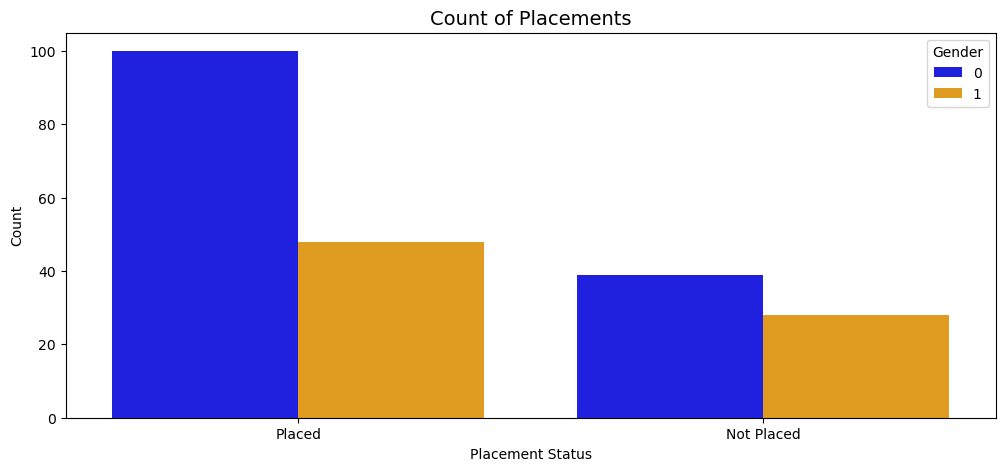

In [22]:
plt.figure(figsize=(12, 5))
plt.title('Count of Placements', size=14)

sns.countplot(x='Status', data=df, hue='Gender', palette=['blue', 'orange'])

plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Placed', 'Not Placed'])
plt.show()


<AxesSubplot:xlabel='12th_specialization', ylabel='count'>

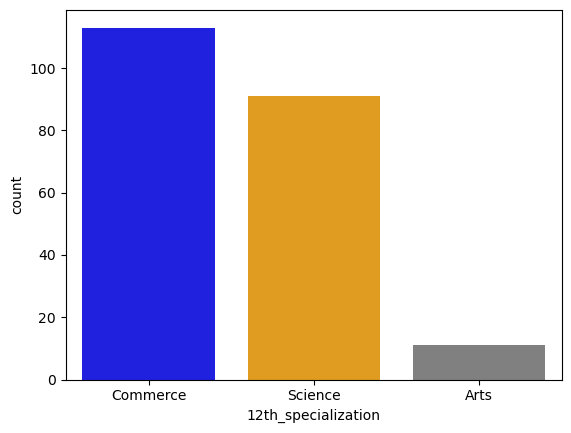

In [23]:
# count for hsc specialization
sns.countplot(x='12th_specialization',data=df, palette=['blue', 'orange', 'gray'])

<AxesSubplot:xlabel='graduation_stream', ylabel='count'>

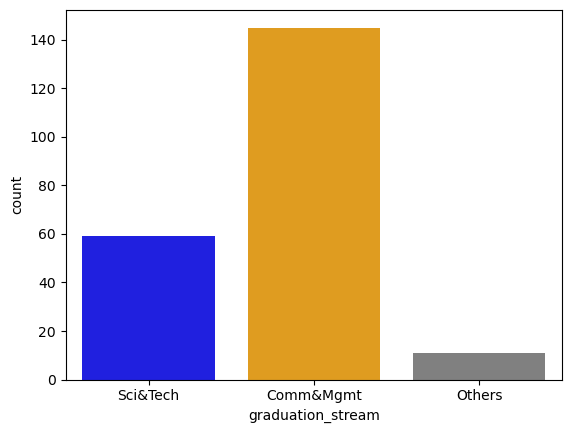

In [24]:
sns.countplot(x='graduation_stream',data=df, palette=['blue', 'orange', 'gray'])

<AxesSubplot:xlabel='MBA_specialization', ylabel='count'>

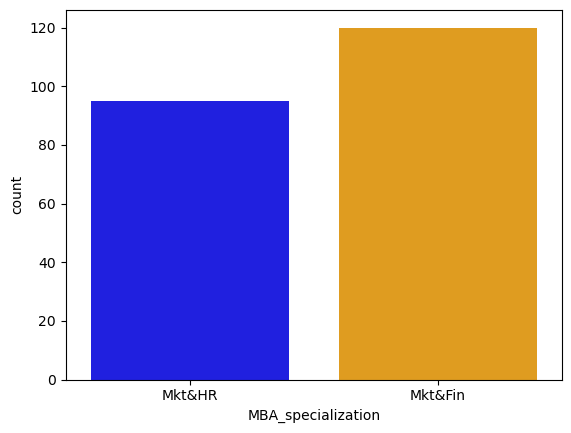

In [25]:
sns.countplot(x='MBA_specialization',data=df, palette=['blue', 'orange'])

<AxesSubplot:xlabel='Work_experience', ylabel='count'>

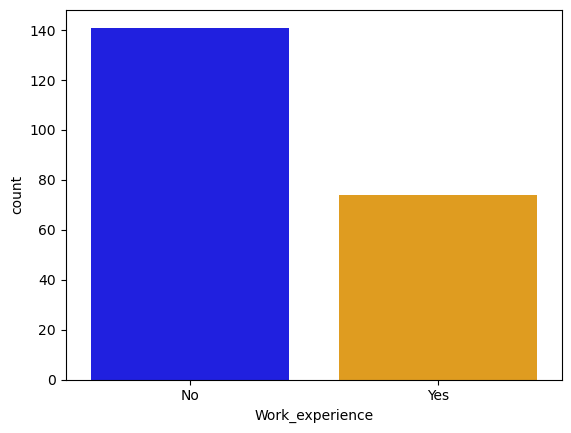

In [26]:
# work experience
sns.countplot(x='Work_experience',data=df, palette=['blue', 'orange'])

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='10th%', ylabel='Density'>

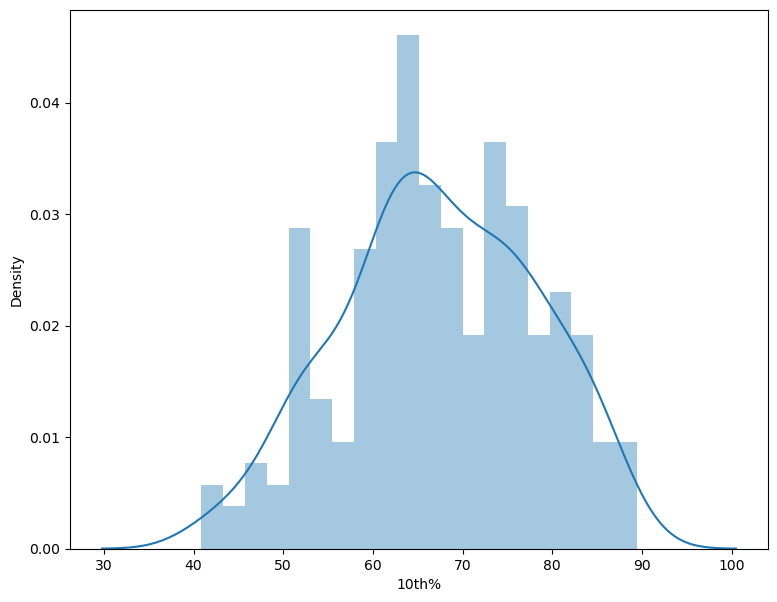

In [27]:
#  10th percentage distribution
plt.figure(figsize=(9,7))
sns.distplot(df['10th%'],bins=20)

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12th%', ylabel='Density'>

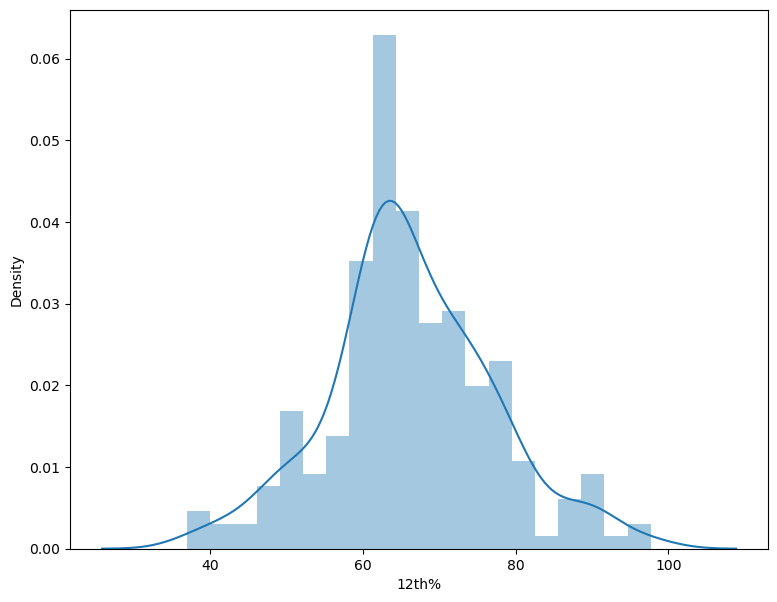

In [28]:
#  12th percentage distribution
plt.figure(figsize=(9,7))
sns.distplot(df['12th%'],bins=20)

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='graduation%', ylabel='Density'>

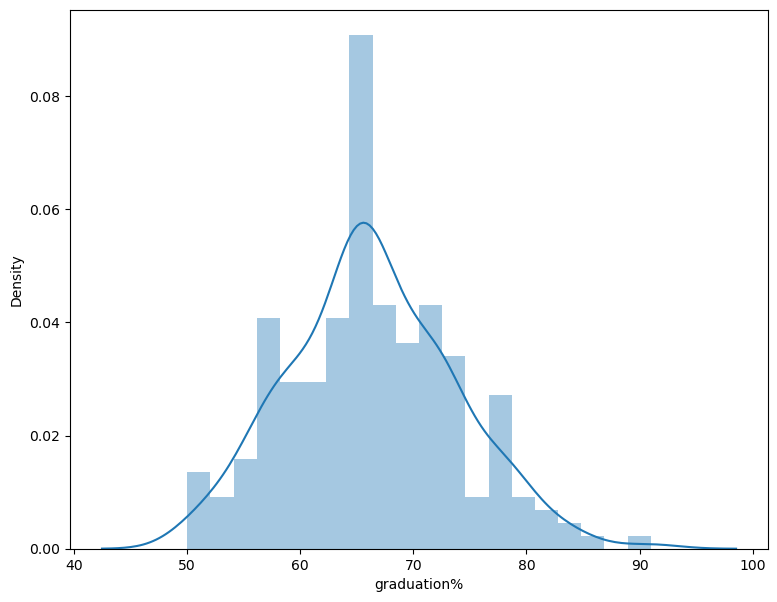

In [29]:
#  garduation percentage distribution
plt.figure(figsize=(9,7))
sns.distplot(df['graduation%'],bins=20)

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='online_test%', ylabel='Density'>

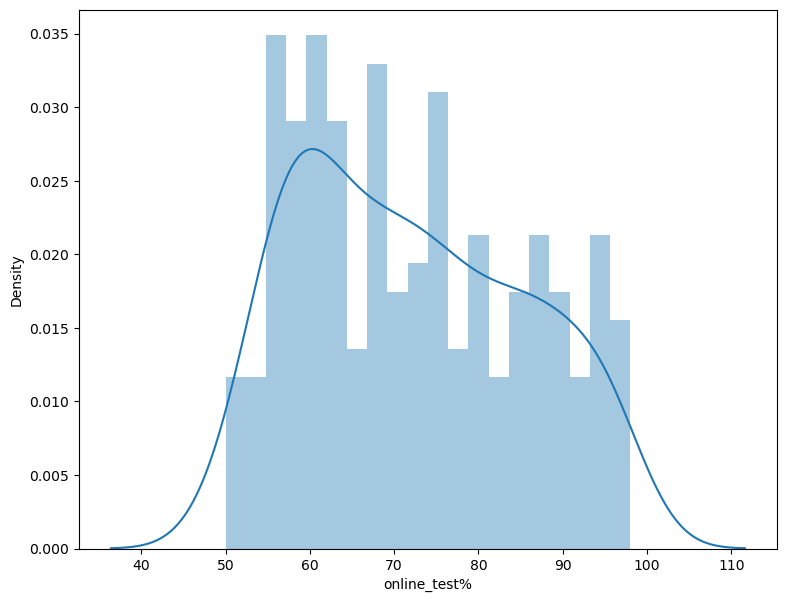

In [30]:
#  online test percentage distribution
plt.figure(figsize=(9,7))
sns.distplot(df['online_test%'],bins=20)

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MBA%', ylabel='Density'>

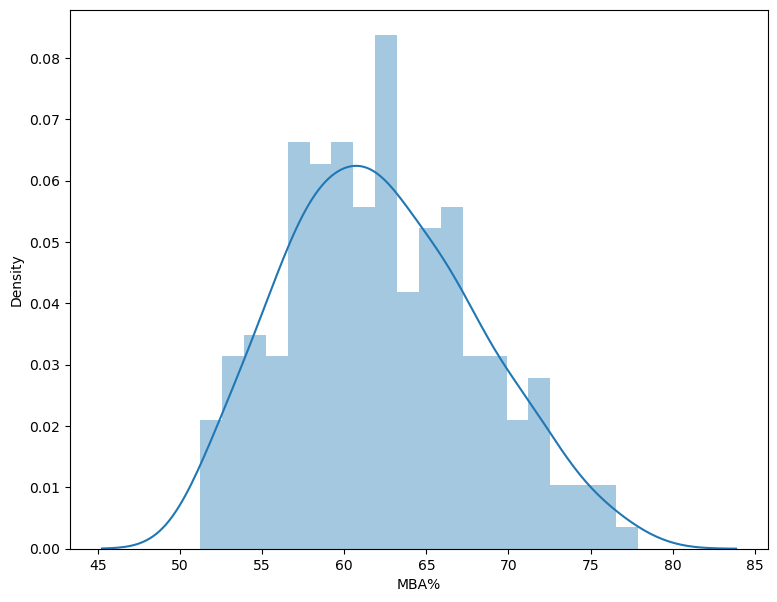

In [31]:
#  MBA percentage distribution
plt.figure(figsize=(9,7))
sns.distplot(df['MBA%'],bins=20)

In [32]:
df['Status'].value_counts()

Placed        148
Not Placed     67
Name: Status, dtype: int64

In [33]:
df

,S.No,Gender,10th%,10th_board,12th%,12th_board,12th_specialization,graduation%,graduation_stream,Work_experience,online_test%,MBA_specialization,MBA%,Status,Salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
df[categorical.columns] = df[categorical.columns].apply(lambda x:labelencoding.fit_transform(x))

In [35]:
df

,S.No,Gender,10th%,10th_board,12th%,12th_board,12th_specialization,graduation%,graduation_stream,Work_experience,online_test%,MBA_specialization,MBA%,Status,Salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [36]:
df.columns

Index(['S.No', 'Gender', '10th%', '10th_board', '12th%', '12th_board',
       '12th_specialization', 'graduation%', 'graduation_stream',
       'Work_experience', 'online_test%', 'MBA_specialization', 'MBA%',
       'Status', 'Salary'],
      dtype='object')

<AxesSubplot:>

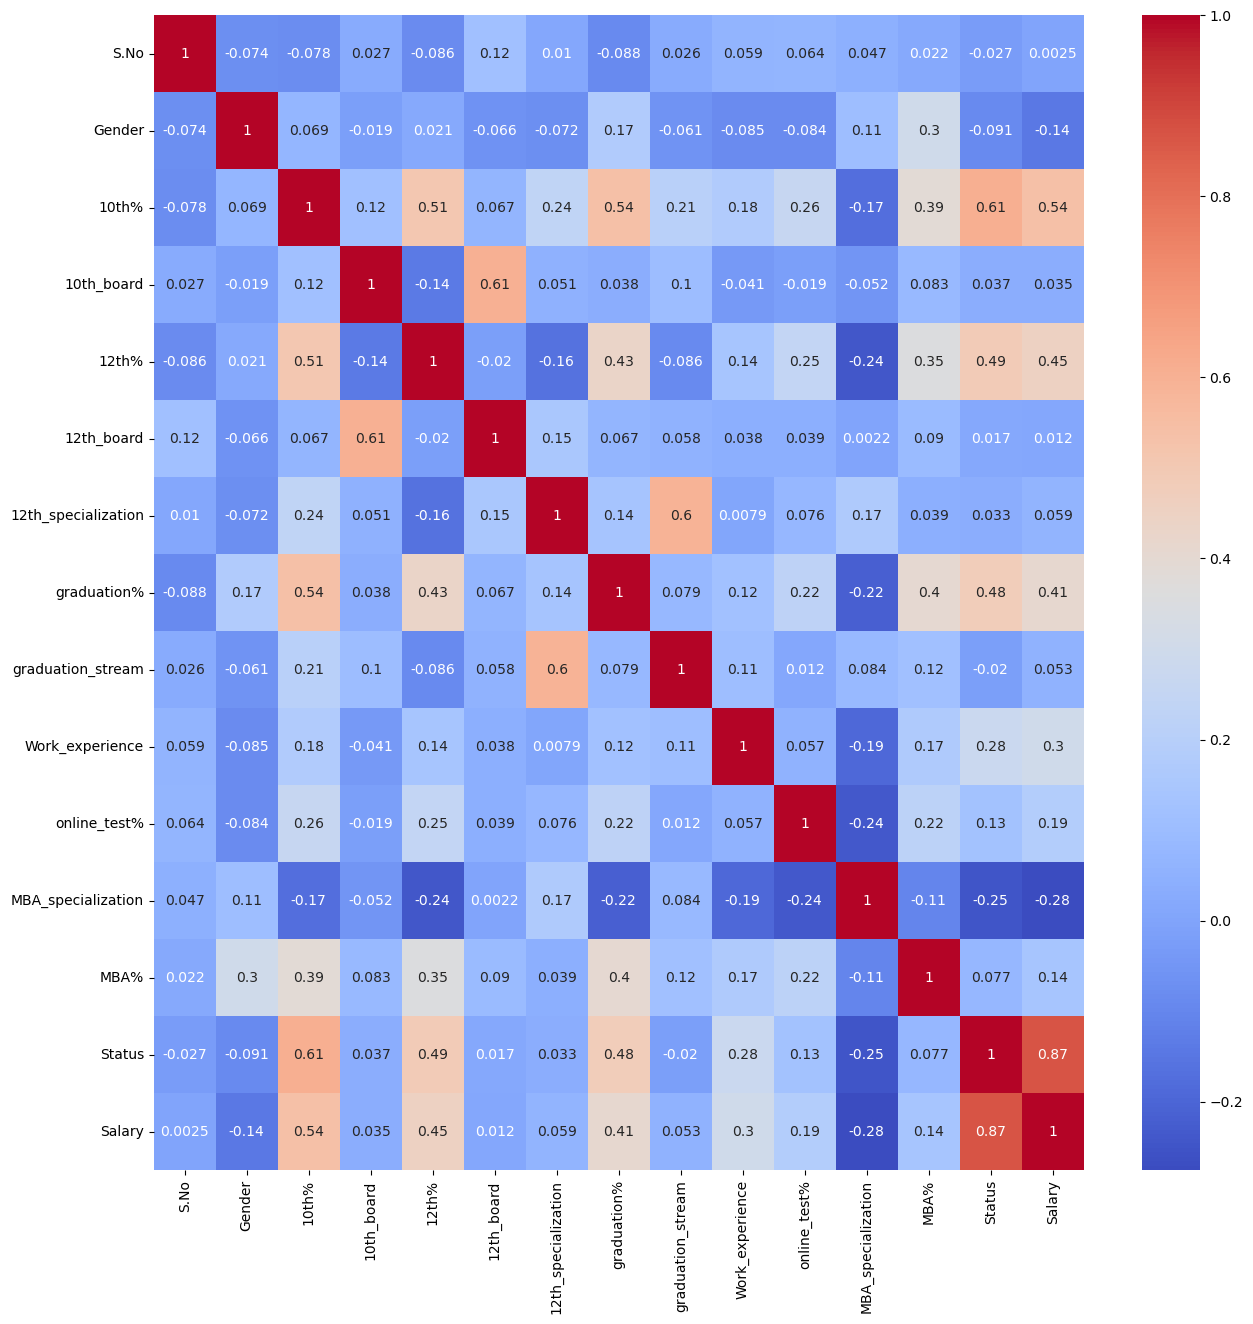

In [37]:
#Creating the figure of the heatmap
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

### as we know salary is highly correlated with status(placed/not placed)

In [38]:
df=df.drop(['S.No','Salary'], axis=1)

In [39]:
df.columns

Index(['Gender', '10th%', '10th_board', '12th%', '12th_board',
       '12th_specialization', 'graduation%', 'graduation_stream',
       'Work_experience', 'online_test%', 'MBA_specialization', 'MBA%',
       'Status'],
      dtype='object')

In [40]:
### modeling
X = df.drop('Status', axis=1)
y = df['Status']

In [41]:
print(X.shape)
print(y.shape)


(215, 12)
(215,)


In [42]:
vlist = ['10th%','12th%','graduation%','online_test%','MBA%']
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()
X[vlist]= scaler.fit_transform(X[vlist])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)


In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(172, 12)
(172,)
(43, 12)
(43,)


In [45]:
results=dict()
results["Algorithm"]=[]
results["Accuracy"]=[]
results["Precision"]=[]
results['ROC-AUC Curve']=[]

In [46]:
for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    rac = roc_auc_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"acc: {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    results["Algorithm"].append(i)
    results["Accuracy"].append(acc)
    results["Precision"].append(p_s)
    results['ROC-AUC Curve'].append(rac)

Algo: ExtraTreesClassifier()
acc: 0.8604651162790697

-------------------------------------------------------
[[12  4]
 [ 2 25]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.86      0.93      0.89        27

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.86      0.86      0.86        43


Algo: RandomForestClassifier()
acc: 0.9069767441860465

-------------------------------------------------------
[[13  3]
 [ 1 26]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.90      0.96      0.93        27

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91   

In [47]:
for i in [SVC(),LogisticRegression(),XGBClassifier()]:
  model = i.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  rac = roc_auc_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)
  results['ROC-AUC Curve'].append(rac)

Algo: SVC()
acc: 0.9069767441860465

-------------------------------------------------------
[[13  3]
 [ 1 26]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.90      0.96      0.93        27

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91      0.91      0.91        43


Algo: LogisticRegression()
acc: 0.9069767441860465

-------------------------------------------------------
[[14  2]
 [ 2 25]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.93      0.93      0.93        27

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91    

In [48]:
#test_accuracy
pd.DataFrame(results)

,Algorithm,Accuracy,Precision,ROC-AUC Curve
0,"(ExtraTreeClassifier(random_state=1761780705),...",0.860465,0.862069,0.837963
1,"(DecisionTreeClassifier(max_features='auto', r...",0.906977,0.896552,0.887731
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.883721,0.923077,0.881944
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.883721,0.892857,0.869213
4,SVC(),0.906977,0.896552,0.887731
5,LogisticRegression(),0.906977,0.925926,0.900463
6,"XGBClassifier(base_score=None, booster=None, c...",0.883721,0.892857,0.869213


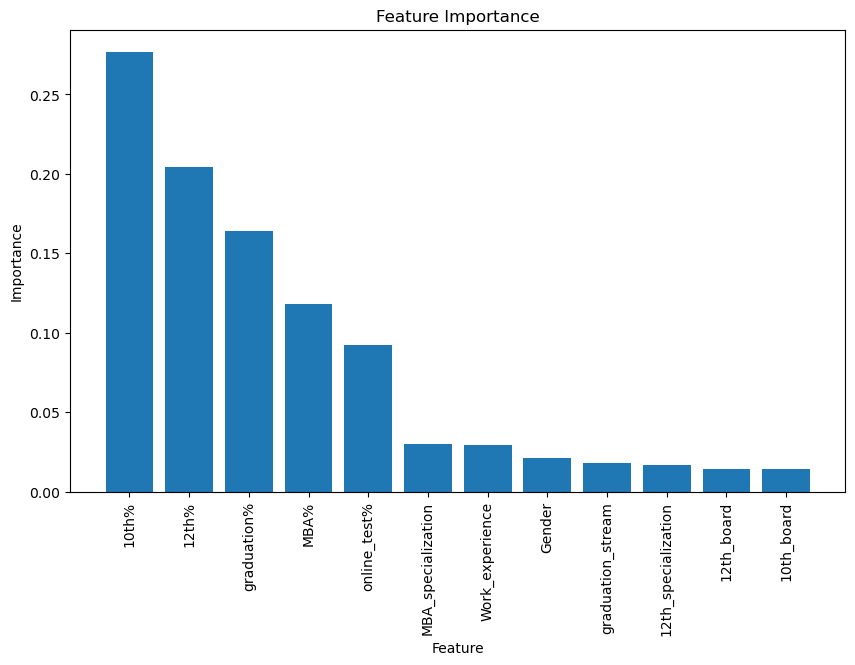

In [51]:
# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [61]:
#train accuracy
for i in [RandomForestClassifier()]:
  model = i.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  acc = accuracy_score(y_train, y_train_pred)
  con_m = confusion_matrix(y_train, y_train_pred)
  c_r = classification_report(y_train, y_train_pred)
  p_s = precision_score(y_train, y_train_pred)
  rac = roc_auc_score(y_train, y_train_pred)  
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)
  results['ROC-AUC Curve'].append(rac)

Algo: RandomForestClassifier()
acc: 1.0

-------------------------------------------------------
[[ 51   0]
 [  0 121]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       121

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172




In [64]:
#test_accuracy
for i in [RandomForestClassifier()]:
  model = i.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  rac = roc_auc_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)
  results['ROC-AUC Curve'].append(rac)

Algo: RandomForestClassifier()
acc: 0.9069767441860465

-------------------------------------------------------
[[13  3]
 [ 1 26]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.90      0.96      0.93        27

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91      0.91      0.91        43




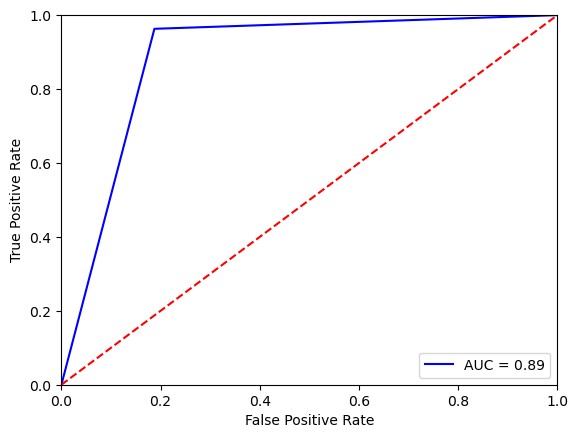

In [65]:
 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc =rac

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RandomForestClassifier model gives 90% accuracy.